In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors

### Kmean Package

In [55]:
from sklearn.cluster import KMeans

In [71]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 模拟数据

In [72]:
#产生模拟数据
N = 1500
centers =4
#产生等方差的数据集（中心点随机的）
data,y = ds.make_blobs(N,n_features=2,centers= centers,random_state = 14)

#产生中心点确定，给定对应方差数据集
data2,y2 = ds.make_blobs(N,n_features=2,centers= [(-10,-8),(-5,8),(5,2),(8,-1)])

#方差相同，样本数量不同的数据集
data3 = np.vstack((data[y==0][:200],data[y==1][:100],data[y==2][:10],data[y==3][:50]))
y3 = np.array([0]*200 +[1]*100 +[2]*10 +[3]*50)

In [73]:
data

array([[-3.32263664,  8.1151865 ],
       [ 2.55323261, -4.48103907],
       [ 7.2071885 , -8.96505242],
       ...,
       [-0.11083146, -3.0810837 ],
       [-3.4704827 ,  8.30518178],
       [-1.50625962, -3.61453941]])

In [74]:
y[:20]

array([2, 3, 1, 0, 3, 0, 0, 0, 1, 3, 2, 3, 1, 3, 1, 1, 3, 1, 2, 0])

In [75]:
data3

array([[-1.51475208e+00,  5.43633633e+00],
       [ 1.80680181e+00,  5.07742979e+00],
       [ 1.21293247e+00,  5.27475309e+00],
       [-1.53377722e-01,  6.78985282e+00],
       [ 1.28814028e+00,  6.75640040e+00],
       [-2.20391841e+00,  3.86597945e+00],
       [-1.80884066e+00,  7.17783880e+00],
       [-1.07025928e+00,  5.25508320e+00],
       [ 1.47474625e+00,  6.23617345e+00],
       [-8.37997850e-02,  5.04860417e+00],
       [-1.22230175e+00,  5.67441049e+00],
       [ 1.61660246e-01,  6.86170165e+00],
       [-1.27501080e+00,  5.55935306e+00],
       [ 1.31511571e+00,  5.57580096e+00],
       [-3.59212801e-03,  6.66782900e+00],
       [-3.07260589e+00,  4.29499738e+00],
       [ 1.71558407e+00,  4.82064049e+00],
       [ 9.92458670e-01,  5.52550595e+00],
       [ 1.21055994e+00,  4.91269974e+00],
       [ 7.45033838e-01,  7.93134640e+00],
       [-1.03423668e+00,  5.79379456e+00],
       [ 2.80652846e-01,  5.64465197e+00],
       [ 1.12137027e+00,  6.44202734e+00],
       [-8.

In [76]:
y3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

### 训练

In [77]:
km = KMeans(n_clusters = centers,init='random',random_state=28)
km.fit(data,y)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=28, tol=0.0001, verbose=0)

In [78]:
y_hat = km.predict(data)

In [79]:
#所有样本距离簇中心点的总距离和
km.inertia_

3080.115349898243

In [80]:
km.inertia_/N

2.0534102332654953

In [81]:
#查看中心点
cluster_centers = km.cluster_centers_
cluster_centers

array([[-3.78071415,  9.16749757],
       [ 0.29669565, -3.54231139],
       [ 0.16320879,  5.36270861],
       [ 7.40972957, -9.82432669]])

In [82]:
y_hat2 = km.fit_predict(data2)
y_hat3 = km.fit_predict(data3)

# 可视化

In [83]:
def expandBorder(a,b):
    d = (b-a)*0.1
    return a-d,b+d

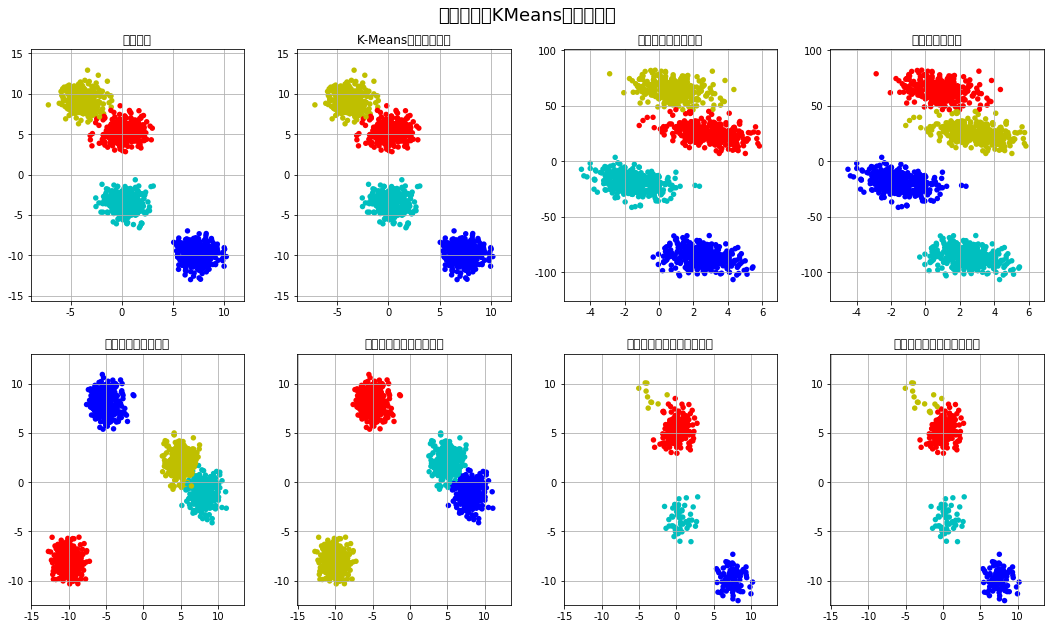

In [86]:
cm = mpl.colors.ListedColormap(list('rgbmyc'))
plt.figure(figsize=(15,9),facecolor='w')

#绘制原始数据
plt.subplot(241)
plt.scatter(data[:,0],data[:,1],c=y,s=30,cmap=cm,edgecolors='none')
x1_min,x2_min = np.min(data,axis=0)
x1_max,x2_max = np.max(data,axis=0)
x1_min,x1_max = expandBorder(x1_min,x1_max)
x2_min,x2_max = expandBorder(x2_min,x2_max)
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'原始数据')
plt.grid(True)

#聚类结果
plt.subplot(242)
plt.scatter(data[:,0],data[:,1],c=y,s=30,cmap=cm,edgecolors='none')
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'K-Means算法聚类结果')
plt.grid(True)

#对数据做旋转
m = np.array(((1,-5),(0.5,5)))
data_r = data.dot(m)

plt.subplot(243)
plt.scatter(data_r[:,0],data_r[:,1],c=y,s=30,cmap=cm,edgecolors='none')
x1_min,x2_min = np.min(data_r,axis=0)
x1_max,x2_max = np.max(data_r,axis=0)
x1_min,x1_max = expandBorder(x1_min,x1_max)
x2_min,x2_max = expandBorder(x2_min,x2_max)
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'数据旋转后的原始图')
plt.grid(True)

#旋转后的预测图
plt.subplot(244)
plt.scatter(data_r[:,0],data_r[:,1],c=km.fit_predict(data_r),s=30,cmap=cm,edgecolors='none')
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'旋转后的预测图')
plt.grid(True)

#不同方差原始数据
plt.subplot(245)
plt.scatter(data2[:,0],data2[:,1],c=y2,s=30,cmap=cm,edgecolors='none')
x1_min,x2_min = np.min(data2,axis=0)
x1_max,x2_max = np.max(data2,axis=0)
x1_min,x1_max = expandBorder(x1_min,x1_max)
x2_min,x2_max = expandBorder(x2_min,x2_max)
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'不同方差的原始数据')
plt.grid(True)

#不同方差的聚类效果
plt.subplot(246)
plt.scatter(data2[:,0],data2[:,1],c=y_hat2,s=30,cmap=cm,edgecolors='none')
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'不同方差数据的聚类效果')
plt.grid(True)

#不同簇样本数据
plt.subplot(247)
plt.scatter(data3[:,0],data3[:,1],c=y3,s=30,cmap=cm,edgecolors='none')
x1_min,x2_min = np.min(data2,axis=0)
x1_max,x2_max = np.max(data2,axis=0)
x1_min,x1_max = expandBorder(x1_min,x1_max)
x2_min,x2_max = expandBorder(x2_min,x2_max)
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'不同簇样本数量的原始数据')
plt.grid(True)

#不同簇的聚类效果
plt.subplot(248)
plt.scatter(data3[:,0],data3[:,1],c=y_hat3,s=30,cmap=cm,edgecolors='none')
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title(u'不同簇样本数量的聚类效果')
plt.grid(True)

plt.tight_layout(2,rect=(0,0,1,0.97))
plt.suptitle(u'数据分布对KMeans聚类的影响',fontsize=18)
plt.show()

In [85]:
help(plt.tight_layout)

Help on function tight_layout in module matplotlib.pyplot:

tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    Automatically adjust subplot parameters to give specified padding.
    
    Parameters
    ----------
    pad : float
        Padding between the figure edge and the edges of subplots,
        as a fraction of the font size.
    h_pad, w_pad : float, optional
        Padding (height/width) between edges of adjacent subplots,
        as a fraction of the font size.  Defaults to *pad*.
    rect : tuple (left, bottom, right, top), optional
        A rectangle (left, bottom, right, top) in the normalized
        figure coordinate that the whole subplots area (including
        labels) will fit into. Default is (0, 0, 1, 1).

